In [1]:
import cv2

from lexoid.api import parse
from lexoid.core.conversion_utils import convert_doc_to_base64_images, base64_to_cv2_image
from lexoid.core.utils import find_bboxes_for_substring, visualize_bounding_boxes

/home/dilith/Projects/oidlabs/pdf-parser/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pdf_path = "inputs/test_1.pdf"

In [3]:
page_images = convert_doc_to_base64_images(pdf_path)
_, b64_img = page_images[0]
cv2_img = base64_to_cv2_image(b64_img)
rgb_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)

## With `STATIC_PARSE`

In [4]:
result = parse(pdf_path, parser_type="STATIC_PARSE", return_bboxes=True, bbox_framework="paddleocr")

2025-09-19 14:50:21.038 | DEBUG    | lexoid.core.utils:is_supported_file_type:64 - File type: application/pdf
2025-09-19 14:50:21.043 | DEBUG    | lexoid.api:parse_chunk:125 - Using static parser
2025-09-19 14:50:21.117 | DEBUG    | lexoid.api:parse_chunk:137 - Extracting bounding boxes...
/home/dilith/Projects/oidlabs/pdf-parser/.venv/lib/python3.12/site-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/dilith/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/

In [5]:
seg_idx = 0
segment = result["segments"][seg_idx]
content = segment["content"]
bboxes = segment["bboxes"]

Found 3 bounding boxes: [[0.3352007469654529, 0.14393939393939395, 0.34821428571428575, 0.16508838383838384], [0.34821428571428575, 0.14393939393939395, 0.4002684407096172, 0.16508838383838384], [0.4002684407096172, 0.14393939393939395, 0.4783496732026144, 0.16508838383838384]]


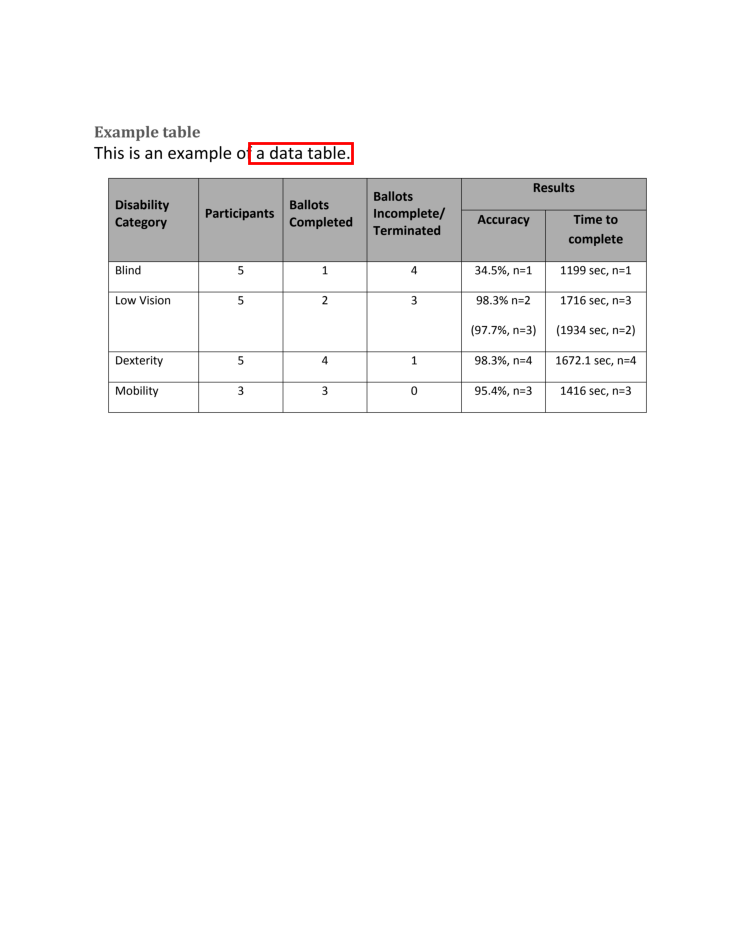

In [6]:
substring = "a data table"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring)
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(rgb_img, matched_bboxes)

Found 2 bounding boxes: [[0.5073529411764706, 0.19444444444444445, 0.565359477124183, 0.2077020202020202], [0.3897058823529412, 0.20359848484848486, 0.4477124183006536, 0.21654040404040403]]


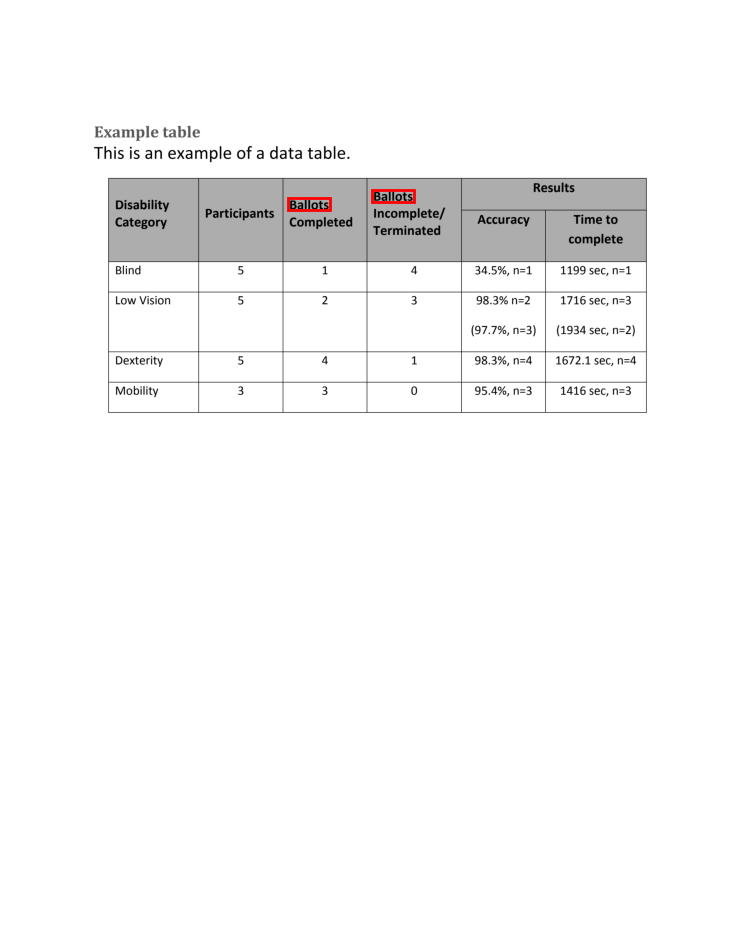

In [7]:
substring = "Ballots"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring, match_mode="all_matches")
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(rgb_img, matched_bboxes)

## With `LLM_PARSE`

In [8]:
result = parse(pdf_path, parser_type="LLM_PARSE", return_bboxes=True)

2025-09-19 14:50:39.886 | DEBUG    | lexoid.core.utils:is_supported_file_type:64 - File type: application/pdf
2025-09-19 14:50:39.892 | DEBUG    | lexoid.api:parse_chunk:128 - Using LLM parser
2025-09-19 14:50:44.827 | DEBUG    | lexoid.api:parse_chunk:137 - Extracting bounding boxes...
2025-09-19 14:50:44.829 | DEBUG    | lexoid.core.utils:bbox_router:570 - Using PDFPlumber for PDF without images.


In [9]:
seg_idx = 0
segment = result["segments"][seg_idx]
content = segment["content"]
bboxes = segment["bboxes"]

Found 3 bounding boxes: [(0.7894117647058824, 0.21915151515151512, 0.8298627450980393, 0.2343030303030303), (0.8343137254901961, 0.21915151515151512, 0.8517254901960783, 0.2343030303030303), (0.7821568627450981, 0.24036363636363628, 0.8588823529411764, 0.2555151515151514)]


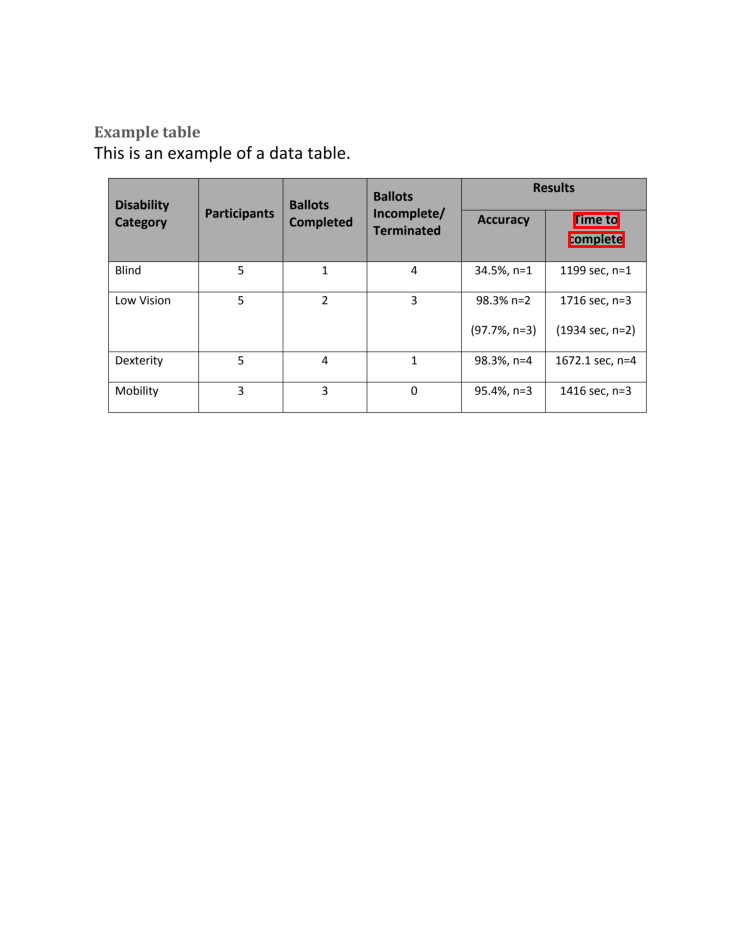

In [10]:
substring = "Time 2 complete"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring)
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(rgb_img, matched_bboxes)

Found 2 bounding boxes: [(0.7043082352941176, 0.372249696969697, 0.7316917647058824, 0.3861890909090909), (0.8501913725490194, 0.372249696969697, 0.8775749019607842, 0.3861890909090909)]


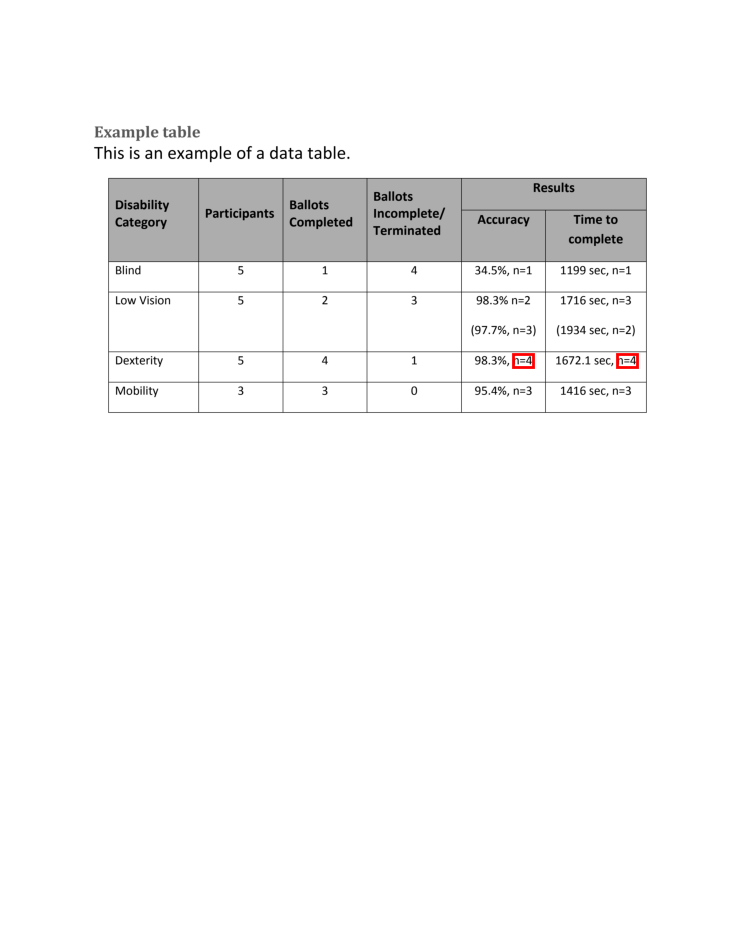

In [13]:
substring = "n=4"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring, match_mode="all_matches")
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(rgb_img, matched_bboxes)

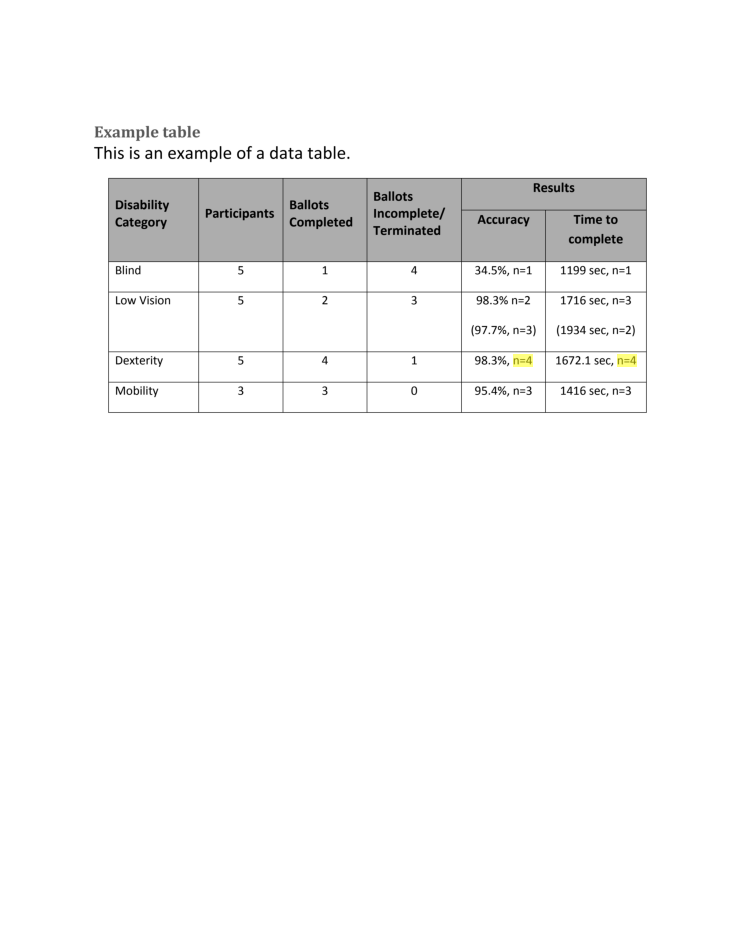

In [14]:
visualize_bounding_boxes(rgb_img, matched_bboxes, highlight=True)